In [46]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import scipy.optimize as sp

from matplotlib import pyplot as plt

In [33]:

def calculate_oscilloscope_uncertainty(najpod, u_b = 0):
    return np.sqrt((najpod**2 + u_b**2) /3) 

def calculate_analog_meter_uncertainties(klasa, zakres, najpod=0, u_be=0):
    return np.sqrt(((klasa*zakres)**2 + najpod**2 + u_be**2)/3)

def calculate_sole_b_uncertainty(series, u_b, u_be=0):
    return np.sqrt(series/series*((u_b**2)/3 + (u_be**2)/3)) #returns a number

def calculate_digital_meter_deltas(series, klasa, dgt):
    delta_x = klasa * series + dgt
    return series/series * delta_x
    
def calculate_digital_meter_uncertainties(series, klasa, dgt):
    return calculate_digital_meter_deltas(series,klasa,dgt)/np.sqrt(3)

def calculate_sanwa_uncertainties(series, c1, c2, zakres):
    return (c1*series + c2*zakres)/np.sqrt(3)

In [42]:
T_s = pd.DataFrame()
T_m = pd.DataFrame()
R = pd.DataFrame()

T_s['T'] = [0,
23,
26.8,
30,
35,
40,
45,
50,
55,
60,
65,
70,
75,
80,
85,
90,
95,
100,
105,
110,
115,

]
T_m['T'] = [0,
21.6,
25.3,
28.5,
33.3,
38.3,
43.2,
48.2,
52.7,
58.2,
63.0,
68.2,
73.4,
78.1,
83.1,
88.0,
92.9,
98.0,
102.8,
107.3
]
T_m['u'] = calculate_sole_b_uncertainty(T_m['T'], 1, 1)

R['R'] = [30.18,
17.55,
15.77,
14.15,
12.30,
10.62,
9.32,
8.05,
7.20,
6.14,
5.55,
4.80,
4.25,
3.810,
3.361,
3.012,
2.669,
2.378,
2.137,
1.945,
]
R *= 1000
R['c1'] = [0.015 for x in R['R']]
R['c2'] = [0.00125 for x in R['R']]
R['zak'] = [ (40e3 if i <= 12 else 4e3) for i in range(len(R['R']))]
R['u'] = calculate_sanwa_uncertainties(R['R'],R['c1'], R['c2'], R['zak'])

T_s = T_s[1:]
T_m = T_m[1:]
R = R[1:]


/home/tobiaszfic/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


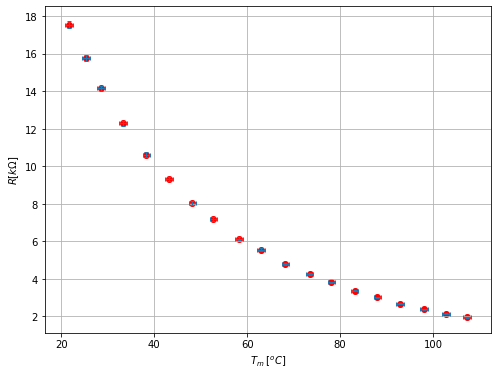

In [65]:

fig, ax = plt.subplots(1,1, figsize =(8,6))

dotcolor = 'orange'
# ax.plot(T_m['T'],R['R']/1000, color = dotcolor)
dotcolor = 'red'
ax.scatter(T_m['T'],R['R']/1000, color = dotcolor)
ax.errorbar(T_m['T'],R['R']/1000, xerr=T_m['u'], yerr=R['u']/1000, elinewidth=1, capthick=1, capsize=2, fmt='none')

ax.set_xlabel(r'$T_m \; [^oC]$')
ax.set_ylabel(r'$R[k\Omega]$')


def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = sp.curve_fit(func, T_m['T'], R['R'])

# plt.savefig('out/charakterystyka_temp.jpg', dpi = 450)


plt.grid()
plt.show()

ln R od 1/T
do tego linefit
